In [1]:
id = {'KLONGTEI': 'cluster_1892287670_272491964_272492178',
      'RAMA4': 'cluster_272488163_282390730_66263210_66263222',
      'NARANONG': 'cluster_272488164_272492179_3457051443_61907354',
      'SUNTHON': 'gneJ83',
      'KASEMRAT': 'cluster_272448137_272555800_272555808_7660045934_7710268409',
      'VIRTUAL' : '270329335'}
number_phase = [3,7,6,4,3,3]

In [81]:
#reset the environment
def reset():
    sumoBinary = checkBinary('sumo')
    traci.start([sumoBinary, "-c", "Kasemrat-SUMO-UsingBookNetFile/osm.sumocfg",
                             "--tripinfo-output", "tripinfo.xml", '--start','true','--quit-on-end','true','--time-to-teleport','-1'])

In [3]:
import csv
import os, sys
sys.path.append(os.path.join('/home/ring/sumo-svn/', 'tools'))
import traci
import traci.constants as tc
import numpy as np
from sumolib import checkBinary
import datetime
import matplotlib
import matplotlib.pyplot as plt
import torch
import copy
import pandas as pd

In [4]:
namelane_csv = pd.read_csv('namelane_KASEMRAT.csv')
namelane_df = pd.DataFrame(namelane_csv, columns = ['name' , 'id'])
NAME = namelane_df.set_index('name')
ID = namelane_df.set_index('id')
if NAME.loc['KASEMRAT_EB_1_0_XSXX','id'] == '459551209#3_0':
    print('ok')

ok


In [5]:
# list(NAME['id'])

In [6]:
ID.loc['824116550#0_0']#, '820373198#0', '820373196#0', '482209831#0']

name    NARANONG_SW_1_0_LSXX
Name: 824116550#0_0, dtype: object

In [7]:
# RAMA4
RAMA4_EB_R = [NAME.loc['RAMA4_EB_2_4_XSXX','id'], NAME.loc['RAMA4_EB_1_3_XSRU','id']]
RAMA4_EB = [NAME.loc['KLONGTEI_EB_1_0_XSXX','id'],NAME.loc['KLONGTEI_EB_1_1_XSXX','id'],NAME.loc['KLONGTEI_EB_1_2_XSXX','id'],NAME.loc['KLONGTEI_EB_1_3_XSXX','id'],NAME.loc['KLONGTEI_EB_1_4_XSRU','id'],NAME.loc['KLONGTEI_EB_2_0_XSXX','id'],NAME.loc['KLONGTEI_EB_2_1_XSXX','id'],NAME.loc['KLONGTEI_EB_2_2_XSXX','id'],NAME.loc['KLONGTEI_EB_2_3_XSXX','id'],NAME.loc['KLONGTEI_EB_3_0_LSXX','id'],NAME.loc['KLONGTEI_EB_3_1_XSXX','id'],NAME.loc['KLONGTEI_EB_3_2_XSXX','id'],NAME.loc['KLONGTEI_EB_3_3_XSXX','id'],NAME.loc['KLONGTEI_EB_4_0_LSXX','id'],NAME.loc['KLONGTEI_EB_4_1_XSXX','id'],NAME.loc['KLONGTEI_EB_5_0_XSXX','id'],NAME.loc['KLONGTEI_EB_5_1_XSXX','id'],NAME.loc['KLONGTEI_EB_5_2_XSXX','id'],NAME.loc['KLONGTEI_EB_5_3_XSXX','id'],NAME.loc['KLONGTEI_EB_5_4_XSXX','id'],NAME.loc['KLONGTEI_EB_6_0_XSXX','id'],NAME.loc['KLONGTEI_EB_6_1_XSXX','id'],NAME.loc['KLONGTEI_EB_6_2_XSXX','id'],NAME.loc['KLONGTEI_EB_6_3_XSXX','id'],NAME.loc['RAMA4_EB_1_0_XSXX','id'],NAME.loc['RAMA4_EB_1_1_XSXX','id'],NAME.loc['RAMA4_EB_1_2_XSXX','id'],NAME.loc['RAMA4_EB_1_3_XSRU','id'],NAME.loc['RAMA4_EB_2_0_LSXX','id'],NAME.loc['RAMA4_EB_2_1_XSXX','id'],NAME.loc['RAMA4_EB_2_2_XSXX','id'],NAME.loc['RAMA4_EB_2_3_XSXX','id'],NAME.loc['RAMA4_EB_2_4_XSXX','id']]
RAMA4_SB = [NAME.loc['RAMA4_SB_1_0_XSXX','id'],NAME.loc['RAMA4_SB_1_1_XSXX','id'],NAME.loc['RAMA4_SB_1_2_XSRU','id'],NAME.loc['RAMA4_SB_2_0_LSXX','id'],NAME.loc['RAMA4_SB_2_1_XSXX','id'],NAME.loc['RAMA4_SB_2_2_XSXX','id'],NAME.loc['RAMA4_SB_2_3_XSXX','id'],NAME.loc['RAMA4_SB_3_0_XSXX','id'],NAME.loc['RAMA4_SB_3_1_XSXX','id'],NAME.loc['RAMA4_SB_3_2_XSXX','id'],NAME.loc['RAMA4_SB_4_0_XSXX','id'],NAME.loc['RAMA4_SB_4_1_XSXX','id'],NAME.loc['RAMA4_SB_4_2_XSXX','id'],NAME.loc['RAMA4_SB_4_3_XSRX','id'],NAME.loc['RAMA4_SB_5_0_XSXX','id'],NAME.loc['RAMA4_SB_5_1_XSXX','id'],NAME.loc['RAMA4_SB_5_2_XSXX','id'],NAME.loc['RAMA4_SB_6_0_XSXX','id'],NAME.loc['RAMA4_SB_6_1_XSXX','id'],NAME.loc['RAMA4_SB_6_2_XSXX','id'],NAME.loc['RAMA4_SB_6_3_XSXX','id'],NAME.loc['RAMA4_SB_6_4_XSXX','id']]
RAMA4_NB = [NAME.loc['RAMA4_NB_1_0_XSXX','id'],NAME.loc['RAMA4_NB_1_1_XSXX','id'],NAME.loc['RAMA4_NB_1_2_XSRU','id'],NAME.loc['RAMA4_NB_2_0_LSXX','id'],NAME.loc['RAMA4_NB_2_1_XSXX','id'],NAME.loc['RAMA4_NB_2_2_XSXX','id'],NAME.loc['RAMA4_NB_2_3_XSXX','id'],NAME.loc['RAMA4_NB_3_0_XSXX','id'],NAME.loc['RAMA4_NB_3_1_XSXX','id'],NAME.loc['RAMA4_NB_3_2_XSXX','id'],NAME.loc['RAMA4_NB_4_0_XSXX','id'],NAME.loc['RAMA4_NB_4_1_XSXX','id']]
RAMA4_WB = [NAME.loc['RAMA4_WB_1_0_XSXX','id'],NAME.loc['RAMA4_WB_1_1_XSXX','id'],NAME.loc['RAMA4_WB_1_2_XSXX','id'],NAME.loc['RAMA4_WB_1_3_XSXX','id'],NAME.loc['RAMA4_WB_1_4_XSRU','id'],NAME.loc['RAMA4_WB_2_0_LSXX','id'],NAME.loc['RAMA4_WB_2_1_XSXX','id'],NAME.loc['RAMA4_WB_2_2_XSXX','id'],NAME.loc['RAMA4_WB_2_3_XSXX','id'],NAME.loc['RAMA4_WB_2_4_XSXX','id'],NAME.loc['RAMA4_WB_2_5_XSXX','id'],NAME.loc['RAMA4_WB_3_0_XSXX','id'],NAME.loc['RAMA4_WB_3_1_XSXX','id'],NAME.loc['RAMA4_WB_3_2_XSXX','id'],NAME.loc['RAMA4_WB_3_3_XSXX','id'],NAME.loc['RAMA4_WB_4_0_XSXX','id'],NAME.loc['RAMA4_WB_4_1_XSXX','id'],NAME.loc['RAMA4_WB_4_2_XSXX','id'],NAME.loc['RAMA4_WB_5_0_XSXX','id'],NAME.loc['RAMA4_WB_5_1_XSXX','id'],NAME.loc['RAMA4_WB_6_0_LSXX','id'],NAME.loc['RAMA4_WB_6_1_XSXX','id'],NAME.loc['RAMA4_WB_6_2_XSXX','id'],NAME.loc['RAMA4_WB_7_0_LSXX','id'],NAME.loc['RAMA4_WB_7_1_XSXX','id'],NAME.loc['RAMA4_WB_7_2_XSXX','id']]
RAMA4_WB_R = [NAME.loc['RAMA4_WB_1_4_XSRU','id'], NAME.loc['RAMA4_WB_2_5_XSXX','id'],NAME.loc['RAMA4_WB_3_3_XSXX','id']]

In [8]:
KLONGTEI_NB = [NAME.loc['KLONGTEI_NB_1_0_LSXX','id'],NAME.loc['KLONGTEI_NB_1_1_XSXX','id'],NAME.loc['KLONGTEI_NB_1_2_XSXX','id'],NAME.loc['KLONGTEI_NB_1_3_XSRU','id'],NAME.loc['KLONGTEI_NB_2_0_LSXX','id'],NAME.loc['KLONGTEI_NB_2_1_XSXX','id'],NAME.loc['KLONGTEI_NB_2_2_XSXX','id'],NAME.loc['KLONGTEI_NB_2_3_XSXX','id'],NAME.loc['KLONGTEI_NB_3_0_LSXX','id'],NAME.loc['KLONGTEI_NB_3_1_XSXX','id'],NAME.loc['KLONGTEI_NB_3_2_XSXX','id'],NAME.loc['KLONGTEI_NB_3_3_XSXX','id']]

In [9]:
# NARANONG
NARANONG_EB = [NAME.loc['NARANONG_EB_1_0_LSXX','id'],NAME.loc['NARANONG_EB_1_1_XSRU','id'],NAME.loc['NARANONG_EB_2_0_XSXX','id'],NAME.loc['NARANONG_EB_2_1_XSXX','id'],NAME.loc['NARANONG_EB_3_0_XSXX','id'],NAME.loc['NARANONG_EB_3_1_XSXX','id'],NAME.loc['NARANONG_EB_3_2_XSXX','id'],NAME.loc['NARANONG_EB_4_0_XSXX','id'],NAME.loc['NARANONG_EB_4_1_XSRX','id'],NAME.loc['NARANONG_EB_5_0_LSXX','id'],NAME.loc['NARANONG_EB_5_1_XSXX','id'],NAME.loc['NARANONG_EB_6_0_LSXX','id'],NAME.loc['NARANONG_EB_6_1_XSRX','id']]
NARANONG_WB = [NAME.loc['NARANONG_WB_1_0_LSXX','id'],NAME.loc['NARANONG_WB_1_1_XSXX','id'],NAME.loc['NARANONG_WB_1_2_XSXX','id'],NAME.loc['NARANONG_WB_1_3_XSRU','id'],NAME.loc['NARANONG_WB_2_0_XSXX','id'],NAME.loc['NARANONG_WB_2_1_XSXX','id'],NAME.loc['NARANONG_WB_2_2_XSXX','id'],NAME.loc['NARANONG_WB_3_0_LSXX','id'],NAME.loc['NARANONG_WB_3_1_XSXX','id'],NAME.loc['NARANONG_WB_3_2_XSXX','id'],NAME.loc['NARANONG_WB_4_0_XSXX','id'],NAME.loc['NARANONG_WB_4_1_XSXX','id'],NAME.loc['NARANONG_WB_4_2_XSXX','id'],NAME.loc['NARANONG_WB_4_3_XSXX','id'],NAME.loc['NARANONG_WB_5_0_XSXX','id'],NAME.loc['NARANONG_WB_5_1_XSXX','id'],NAME.loc['NARANONG_WB_5_2_XSXX','id']]
NARANONG_SB = [NAME.loc['NARANONG_SB_1_0_LSXX','id'],NAME.loc['NARANONG_SB_1_1_XSXX','id'],NAME.loc['NARANONG_SB_1_2_XSRX','id'],NAME.loc['NARANONG_SB_2_0_LSXX','id'],NAME.loc['NARANONG_SB_2_1_XSXX','id'],NAME.loc['NARANONG_SB_2_2_XSXX','id'],NAME.loc['NARANONG_SB_2_3_XSXX','id'],NAME.loc['NARANONG_SB_3_0_XSXX','id'],NAME.loc['NARANONG_SB_3_1_XSXX','id'],NAME.loc['NARANONG_SB_3_2_XSXX','id'],NAME.loc['NARANONG_SB_3_3_XSXX','id']]
NARANONG_SW = [NAME.loc['NARANONG_SW_1_1_XSRX','id'],NAME.loc['NARANONG_SW_2_0_XSXX','id'],NAME.loc['NARANONG_SW_2_1_XSXX','id'],NAME.loc['NARANONG_SW_2_2_XSXX','id'],NAME.loc['NARANONG_SW_2_3_XSXX','id'],NAME.loc['NARANONG_SW_3_0_XSXX','id'],NAME.loc['NARANONG_SW_3_1_XSXX','id'],NAME.loc['NARANONG_SW_3_2_XSXX','id']]
NARANONG_NB = [NAME.loc['NARANONG_NB_1_0_XSXX','id'],NAME.loc['NARANONG_NB_1_1_XSRX','id'],NAME.loc['NARANONG_NB_2_0_LSXX','id'],NAME.loc['NARANONG_NB_2_1_XSXX','id'],NAME.loc['NARANONG_NB_2_2_XSXX','id'],NAME.loc['NARANONG_NB_3_0_XSXX','id'],NAME.loc['NARANONG_NB_3_1_XSXX','id']]
NARANONG_EB_R = [NAME.loc['NARANONG_EB_1_1_XSRU','id']]

In [10]:
# SUNTHON
SUNTHON_EB = [NAME.loc['SUNTHON_EB_1_0_LSXX','id'],NAME.loc['SUNTHON_EB_1_1_XSXX','id'],NAME.loc['SUNTHON_EB_1_2_XSRU','id'],NAME.loc['SUNTHON_EB_2_0_XSXX','id'],NAME.loc['SUNTHON_EB_2_1_XSXX','id'],NAME.loc['SUNTHON_EB_2_2_XSXX','id'],NAME.loc['SUNTHON_EB_2_3_XSRX','id'],NAME.loc['SUNTHON_EB_3_0_XSXX','id'],NAME.loc['SUNTHON_EB_3_1_XSXX','id'],NAME.loc['SUNTHON_EB_3_2_XSXX','id'],NAME.loc['SUNTHON_EB_4_0_XSXX','id'],NAME.loc['SUNTHON_EB_4_1_XSXX','id'],NAME.loc['SUNTHON_EB_5_0_XSXX','id']]
SUNTHON_WB = [NAME.loc['SUNTHON_WB_1_0_LSXX','id'],NAME.loc['SUNTHON_WB_1_1_XSXX','id'],NAME.loc['SUNTHON_WB_1_2_XSRX','id'],NAME.loc['SUNTHON_WB_2_0_XSXX','id'],NAME.loc['SUNTHON_WB_2_1_XSXX','id'],NAME.loc['SUNTHON_WB_2_2_XSXX','id'],NAME.loc['SUNTHON_WB_3_0_XSXX','id'],NAME.loc['SUNTHON_WB_3_1_XSXX','id']]
SUNTHON_SB = [NAME.loc['SUNTHON_SB_1_0_LSXX','id'],NAME.loc['SUNTHON_SB_1_1_XSXX','id'],NAME.loc['SUNTHON_SB_1_2_XSRU','id'],NAME.loc['SUNTHON_SB_2_0_LSXX','id'],NAME.loc['SUNTHON_SB_2_1_XSXX','id'],NAME.loc['SUNTHON_SB_2_2_XSXX','id'],NAME.loc['SUNTHON_SB_2_3_XSXX','id'],NAME.loc['SUNTHON_SB_3_0_XSXX','id'],NAME.loc['SUNTHON_SB_3_1_XSXX','id'],NAME.loc['SUNTHON_SB_3_2_XSXX','id'],NAME.loc['SUNTHON_SB_4_0_LSXX','id'],NAME.loc['SUNTHON_SB_4_1_XSXX','id'],NAME.loc['SUNTHON_SB_4_2_XSXX','id'],NAME.loc['SUNTHON_SB_4_3_XSRX','id'],NAME.loc['SUNTHON_SB_5_0_XSXX','id'],NAME.loc['SUNTHON_SB_5_1_XSXX','id'],NAME.loc['SUNTHON_SB_5_2_XSXX','id']]
SUNTHON_NB = [NAME.loc['SUNTHON_NB_1_0_LSXX','id'],NAME.loc['SUNTHON_NB_1_1_XSXX','id'],NAME.loc['SUNTHON_NB_1_2_XSRX','id'],NAME.loc['SUNTHON_NB_2_0_LSXX','id'],NAME.loc['SUNTHON_NB_2_1_XSXX','id'],NAME.loc['SUNTHON_NB_2_2_XSXX','id'],NAME.loc['SUNTHON_NB_3_0_XSXX','id'],NAME.loc['SUNTHON_NB_3_1_XSXX','id'],NAME.loc['SUNTHON_NB_3_2_XSXX','id'],NAME.loc['SUNTHON_NB_4_0_LSXX','id'],NAME.loc['SUNTHON_NB_4_1_XSXX','id'],NAME.loc['SUNTHON_NB_4_2_XSXX','id']]

In [11]:
# KASEMRAT
KASEMRAT_EB = [NAME.loc['KASEMRAT_EB_1_0_XSXX','id'],NAME.loc['KASEMRAT_EB_1_1_XSXX','id'],NAME.loc['KASEMRAT_EB_1_2_XSXX','id'],NAME.loc['KASEMRAT_EB_1_3_XSRU','id'],NAME.loc['KASEMRAT_EB_2_0_LSXX','id'],NAME.loc['KASEMRAT_EB_2_1_XSXX','id'],NAME.loc['KASEMRAT_EB_2_2_XSXX','id'],NAME.loc['KASEMRAT_EB_2_3_XSXX','id'],NAME.loc['KASEMRAT_EB_3_0_LSXX','id'],NAME.loc['KASEMRAT_EB_3_1_XSXX','id'],NAME.loc['KASEMRAT_EB_3_2_XSXX','id'],NAME.loc['KASEMRAT_EB_4_0_LSXX','id'],NAME.loc['KASEMRAT_EB_4_1_XSXX','id'],NAME.loc['KASEMRAT_EB_4_2_XSXX','id'],NAME.loc['KASEMRAT_EB_5_0_LSXX','id'],NAME.loc['KASEMRAT_EB_5_1_XSXX','id'],NAME.loc['KASEMRAT_EB_5_2_XSXX','id'],NAME.loc['KASEMRAT_EB_6_0_LSXX','id'],NAME.loc['KASEMRAT_EB_6_1_XSXX','id'],NAME.loc['KASEMRAT_EB_6_2_XSXX','id'],NAME.loc['KASEMRAT_EB_6_3_XSXX','id'],NAME.loc['KASEMRAT_EB_7_0_LSXX','id'],NAME.loc['KASEMRAT_EB_7_1_XSXX','id'],NAME.loc['KASEMRAT_EB_7_2_XSXX','id'],NAME.loc['KASEMRAT_EB_7_3_XSXX','id'],NAME.loc['KASEMRAT_EB_8_0_LSXX','id'],NAME.loc['KASEMRAT_EB_8_1_XSXX','id'],NAME.loc['KASEMRAT_EB_8_2_XSXX','id'],NAME.loc['KASEMRAT_EB_8_3_XSXX','id'],NAME.loc['KASEMRAT_EB_9_0_XSXX','id'],NAME.loc['KASEMRAT_EB_9_1_XSXX','id'],NAME.loc['KASEMRAT_EB_9_2_XSXX','id'],NAME.loc['KASEMRAT_EB_9_3_XSXX','id'],NAME.loc['KASEMRAT_EB_9_4_XSXX','id'],NAME.loc['KASEMRAT_EB_10_0_XSXX','id'],NAME.loc['KASEMRAT_EB_10_1_XSXX','id'],NAME.loc['KASEMRAT_EB_10_2_XSXX','id'],NAME.loc['KASEMRAT_EB_10_3_XSXX','id']]
KASEMRAT_WB = [NAME.loc['KASEMRAT_WB_1_0_LSXX','id'],NAME.loc['KASEMRAT_WB_1_1_XSXX','id'],NAME.loc['KASEMRAT_WB_1_2_XSXX','id'],NAME.loc['KASEMRAT_WB_2_0_XSXX','id'],NAME.loc['KASEMRAT_WB_2_1_XSXX','id'],NAME.loc['KASEMRAT_WB_2_2_XSXX','id'],NAME.loc['KASEMRAT_WB_2_3_XSRX','id'],NAME.loc['KASEMRAT_WB_3_0_XSXX','id'],NAME.loc['KASEMRAT_WB_3_1_XSXX','id'],NAME.loc['KASEMRAT_WB_3_2_XSXX','id'],NAME.loc['KASEMRAT_WB_4_0_LSXX','id'],NAME.loc['KASEMRAT_WB_4_1_XSXX','id'],NAME.loc['KASEMRAT_WB_4_2_XSXX','id']]
KASEMRAT_NB = [NAME.loc['KASEMRAT_NB_1_0_LSXX','id'],NAME.loc['KASEMRAT_NB_1_1_XSXX','id'],NAME.loc['KASEMRAT_NB_1_2_XSRX','id'],NAME.loc['KASEMRAT_NB_2_0_LSXX','id'],NAME.loc['KASEMRAT_NB_2_1_XSXX','id'],NAME.loc['KASEMRAT_NB_2_2_XSXX','id'],NAME.loc['KASEMRAT_NB_3_0_XSXX','id'],NAME.loc['KASEMRAT_NB_3_1_XSXX','id'],NAME.loc['KASEMRAT_NB_4_0_LSXX','id'],NAME.loc['KASEMRAT_NB_4_1_XSXX','id'],NAME.loc['KASEMRAT_NB_4_2_XSXX','id'],NAME.loc['KASEMRAT_NB_4_3_XSRU','id'],NAME.loc['KASEMRAT_NB_5_0_XSXX','id'],NAME.loc['KASEMRAT_NB_5_1_XSXX','id'],NAME.loc['KASEMRAT_NB_5_2_XSXX','id'],NAME.loc['KASEMRAT_NB_6_0_XSXX','id'],NAME.loc['KASEMRAT_NB_6_1_XSXX','id'],NAME.loc['KASEMRAT_NB_6_2_XSXX','id'],NAME.loc['KASEMRAT_NB_6_3_XSXX','id'],NAME.loc['KASEMRAT_NB_7_0_XSXX','id'],NAME.loc['KASEMRAT_NB_7_1_XSXX','id'],NAME.loc['KASEMRAT_NB_7_2_XSXX','id']]
KASEMRAT_EB_R = [NAME.loc['KASEMRAT_EB_1_3_XSRU','id'],NAME.loc['KASEMRAT_EB_2_3_XSXX','id']]

In [12]:
MASUK = [NAME.loc['MASUK_NB_1_1_LSXX','id'],NAME.loc['MASUK_WB_1_1_LSRX','id'],NAME.loc['MASUK_SB_1_1_XSRU','id'],NAME.loc['MASUK_SB_2_1_LSXU','id'],NAME.loc['MASUK_SB_3_1_LXXX','id']]
SUKHUMVIT = [NAME.loc['MASUK_SB_SUKHUMVUT22','id'],NAME.loc['MASUK_SB_SUKHUMVUT24','id']]

In [13]:
#decision threshold

In [14]:
#MAX GREEN TIME

In [44]:
#reset the environment
def reset():
    sumoBinary = checkBinary('sumo-gui')
    traci.start([sumoBinary, "-c", "Kasemrat-SUMO-UsingBookNetFile/osm.sumocfg",
                             "--tripinfo-output", "tripinfo.xml", '--start','true','--quit-on-end','true','--time-to-teleport','-1',
                '--lanechange.duration', '0.1'])

In [45]:
def get_occupancy_average_percent(detector_id): #get_occupancy_average
    occupancy = sum([traci.lanearea.getLastStepOccupancy(e) for e in detector_id])/len(detector_id)
    return occupancy

In [46]:
def get_flow_sum(detector_id):
    # return number of vehicles on detector_id during last time step
    #https://sumo.dlr.de/docs/TraCI/Lane_Area_Detector_Value_Retrieval.html
    flow = sum([traci.lanearea.getLastStepVehicleNumber(e) for e in detector_id])#-sum([traci.lanearea.getJamLengthVehicle(e) for e in detector_id])
    return flow

In [47]:
def get_mean_speed(detector_id):
    mean_speed = sum([traci.lanearea.getLastStepMeanSpeed(e) for e in detector_id])/len(detector_id)
    return meanspeed

In [48]:
def get_numberoflane(e,detector_id):
    numberoflane = 0
    for d in detector_id:
        if e[:-2] == d[:-2]:
            numberoflane += 1
    return numberoflane 

In [49]:
def get_unjamlength_meters(detector_id): 
    detector_length = sum(traci.lanearea.getLength(e)/get_numberoflane(e,detector_id) for e in detector_id)
    unjamlength = detector_length - (sum([traci.lanearea.getJamLengthMeters(e)/get_numberoflane(e,detector_id) for e in detector_id])) #/detector_length
    return unjamlength

In [67]:
def traffic_police_action(selected_traffic_signal_phases,list_greentime_duration, decision_threshold, max_greentime_duration): 
#     ==
# Function traffic_police_action takes inputs, namely, 

# selected_traffic_signal_phases[even index] = current phase of traffic light signal from previous decision time step
# selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interruption would occur
# greentime_duration = number of seconds that current phase of traffic light signal has been used
# max_greentime_duration = maximum allowable number of seconds for current phase of traffic light signal

# and returns outputs, namely,

# new_selected_traffic_signal_phases = new value of selected_traffic_signal_phases[0] and selected_traffic_signal_phases[1] (defined above) to be deployed till next decision time step
# new_greentime_duration = new value of greentime_duration to be deployed till next decision time step
#     ==
    RAMA4_FP0_TP4_OCC = 10
    RAMA4_FP0_END_MAXGREEN = 120
    RAMA4_FP0_END_MINGREEN = 15
    RAMA4_FP0_END_FLOW = 5
    RAMA4_FP4_END_MAXGREEN = 30
    RAMA4_FP4_END_FLOW = 20
    RAMA4_FP4_END_OCC = 50
    RAMA4_FPX_TP0_UNJAM = 150
    RAMA4_FPX_TP8_UNJAM = 200
    RAMA4_FP2_END_MAXGREEN = 30
    RAMA4_FP2_END_FLOW = 5
    RAMA4_FP6_END_MAXGREEN = 30
    RAMA4_FP6_END_UNJAM = 90
    RAMA4_FP8_END_MAXGREEN = 30
    RAMA4_FP8_END_OCC = 10
    #Rama
    current_phase = selected_traffic_signal_phases[2]
    next_phase_ifno_interupt = selected_traffic_signal_phases[3]
    greentime_duration = list_greentime_duration[1]
#     print('get_flow_sum(get_detector_id(Onnut_edge[WB]))', get_flow_sum(get_detector_id(Onnut_edge['WB'])))
#     print('get_flow_sum(get_detector_id(Onnut_edge[SB]))', get_flow_sum(get_detector_id(Onnut_edge['SB'])))
#     print('unjamlength_meters Onnut_edge WB', get_unjamlength_meters(get_detector_id(Onnut_edge['WB'])))
#     print('occupancy Onnut_edge SB', get_occupancy_average_percent(get_detector_id(Onnut_edge['SB'])))

    if current_phase == 0: #*** --->1
#         print('occupancy',get_occupancy_average_percent(RAMA4_EB))
#         print('flow',get_flow_sum(RAMA4_EB_R))
        if RAMA4_FP0_TP4_OCC >= get_occupancy_average_percent(RAMA4_EB) : #Pupe
            current_phase = 2
        elif RAMA4_FP0_END_MAXGREEN <= greentime_duration or RAMA4_FP0_END_FLOW >= get_flow_sum(RAMA4_EB_R):
            if next_phase_ifno_interupt == None:
                current_phase = 4
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
        elif RAMA4_FPX_TP8_UNJAM >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = 4
            current_phase = 8
    elif current_phase == 4: #---><---3
        if RAMA4_FP4_END_FLOW >= get_flow_sum(RAMA4_WB_R) and \
         RAMA4_FP4_END_OCC >= get_occupancy_average_percent(RAMA4_EB):
            current_phase = 2
        elif RAMA4_FP4_END_MAXGREEN <= greentime_duration: #Pupe
            current_phase = 6
        elif RAMA4_FPX_TP0_UNJAM >= get_unjamlength_meters(RAMA4_EB):
            next_phase_ifno_interupt = 2
            current_phase = 0
        elif RAMA4_FPX_TP8_UNJAM >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = 2
            current_phase = 8
    elif current_phase == 2: #<---2
        if RAMA4_FP2_END_MAXGREEN <= greentime_duration or RAMA4_FP2_END_FLOW >= get_flow_sum(RAMA4_WB_R):
            current_phase = 6
        elif RAMA4_FPX_TP0_UNJAM >= get_unjamlength_meters(RAMA4_EB):
            next_phase_ifno_interupt = 6
            current_phase = 0
        elif RAMA4_FPX_TP8_UNJAM >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = 6
            current_phase = 8
    elif current_phase == 6: #v4
        if RAMA4_FP6_END_MAXGREEN <= greentime_duration or RAMA4_FP6_END_UNJAM >= get_unjamlength_meters(RAMA4_SB):
            current_phase += 2
        elif RAMA4_FPX_TP0_UNJAM >= get_unjamlength_meters(RAMA4_EB):
            next_phase_ifno_interupt = 8
            current_phase = 0
        elif RAMA4_FPX_TP8_UNJAM >= get_unjamlength_meters(RAMA4_NB):
            next_phase_ifno_interupt = None
            current_phase = 8
    elif current_phase == 8: #***** ^5
        if RAMA4_FPX_TP0_UNJAM >= get_unjamlength_meters(RAMA4_EB):
            current_phase = 0
        elif RAMA4_FP8_END_MAXGREEN <= greentime_duration or RAMA4_FP8_END_OCC >= get_occupancy_average_percent(RAMA4_NB):
            if next_phase_ifno_interupt == None:
                current_phase = 0
            else:
                current_phase = next_phase_ifno_interupt
                next_phase_ifno_interupt = None
        
#         elif get_remain_length(get_detector_id(['825786383#0'])) <= 20:
#             next_phase_ifno_interupt = 2
#             current_phase = 2
    if selected_traffic_signal_phases[2] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    Rama4_greentime_duration = greentime_duration
    Rama4_phase = current_phase
    next_Rama4_phase_ifno_interupt = next_phase_ifno_interupt
    
    KLONGTEI_FP2_END_FLOW = 20
    KLONGTEI_NO_P2_MAXGREEN = 120
    KLONGTEI_P2_MAXGREEN = 20
    #KlongTei
    current_phase = selected_traffic_signal_phases[0]
    NO_P2_greentime_duration = list_greentime_duration[0]
    if current_phase == 2:
        if KLONGTEI_FP2_END_FLOW >= get_flow_sum(KLONGTEI_NB) :
            current_phase = 0
    elif Rama4_phase == 0 or Rama4_phase == 4:
        current_phase = 4
    elif Rama4_phase == 2:
        current_phase = 0
    if KLONGTEI_NO_P2_MAXGREEN <= NO_P2_greentime_duration :
        current_phase = 2
    if current_phase == 0 or current_phase == 4:
        NO_P2_greentime_duration += 5
    else: 
        NO_P2_greentime_duration = 0
    Klongtei_NO_P2_greentime_duration = NO_P2_greentime_duration
    Klongtei_phase = current_phase
    next_Klongtei_phase_ifno_interupt = next_phase_ifno_interupt
    
    NARANONG_FP0_TP2_UNJAM = 150
    NARANONG_FP0_END_UNJAM = 300
    NARANONG_FP0_END_MAXGREEN = 45
    NARANONG_FP0_END_MINGREEN = 15
    NARANONG_FP2_END_UNJAM = 500
    NARANONG_FP2_END_MAXGREEN = 90
    NARANONG_FP2_END_MINGREEN = 15
    NARANONG_FP4_END_FLOW = 25
    NARANONG_FP4_END_MAXGREEN = 90
    NARANONG_FP4_END_MINGREEN = 15
    NARANONG_FP6_END_UNJAM = 500
    NARANONG_FP6_END_MAXGREEN = 30
    NARANONG_FP6_END_MINGREEN = 15
    NARANONG_FP8_END_OCC = 30
    NARANONG_FP8_END_MAXGREEN = 30
    NARANONG_FP10_END_OCC = 30
    NARANONG_FP10_END_MAXGREEN = 30
    NARANONG_FPX_TP2_UNJAM = 100
    NARANONG_FPX_TP0_UNJAM = 100

    #NaRanong
    current_phase = selected_traffic_signal_phases[4]
    next_phase_ifno_interupt = selected_traffic_signal_phases[5]
    greentime_duration = list_greentime_duration[2]
#     print('get_unjamlength_meters(NARANONG_SW)',get_unjamlength_meters(NARANONG_SW))
    if current_phase == 0:
        if NARANONG_FP0_END_MINGREEN >= greentime_duration:
            current_phase == 0
        elif NARANONG_FPX_TP2_UNJAM >= get_unjamlength_meters(NARANONG_EB):
            if next_phase_ifno_interupt == None:
                current_phase = 6
            else:
                current_phase = 6 
                next_phase_ifno_interupt = next_phase_ifno_interupt
        elif NARANONG_FP0_END_MAXGREEN <= greentime_duration or \
        NARANONG_FP0_END_UNJAM >= get_unjamlength_meters(NARANONG_SW): 
            if next_phase_ifno_interupt == None:
                current_phase = 2
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
    elif current_phase == 6:
        if NARANONG_FP2_END_MINGREEN >= greentime_duration:
            current_phase == 6
        elif NARANONG_FPX_TP0_UNJAM >= get_unjamlength_meters(NARANONG_SW):
            if next_phase_ifno_interupt == None:
                current_phase = 0
            else:
                current_phase =  0
                next_phase_ifno_interupt = next_phase_ifno_interupt
        elif NARANONG_FP2_END_UNJAM >= get_unjamlength_meters(NARANONG_WB) or NARANONG_FP2_END_MAXGREEN <= greentime_duration:
            if next_phase_ifno_interupt == None:
                current_phase = 4
            else:
                current_phase =  next_phase_ifno_interupt
                next_phase_ifno_interupt = None
    elif current_phase == 4:
        if NARANONG_FP4_END_MINGREEN >= greentime_duration:
            current_phase == 4
        elif NARANONG_FPX_TP2_UNJAM >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 6
        elif NARANONG_FPX_TP0_UNJAM >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 0
        elif NARANONG_FP4_END_FLOW >= get_flow_sum(NARANONG_EB_R) or NARANONG_FP4_END_MAXGREEN <= greentime_duration:
            current_phase = 6
    elif current_phase == 2:
        if NARANONG_FP4_END_MINGREEN >= greentime_duration:
            current_phase = 2
        elif NARANONG_FPX_TP2_UNJAM >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 6
        elif NARANONG_FPX_TP0_UNJAM >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 0
        elif NARANONG_FP6_END_UNJAM >= get_unjamlength_meters(NARANONG_WB) or NARANONG_FP6_END_MAXGREEN <= greentime_duration:
            current_phase = 8
    elif current_phase == 8:
        if NARANONG_FPX_TP2_UNJAM >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 6
        elif NARANONG_FPX_TP0_UNJAM >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 0
        elif NARANONG_FP8_END_OCC >= get_occupancy_average_percent(NARANONG_SB) or NARANONG_FP8_END_MAXGREEN <= greentime_duration:
            current_phase = 10
    elif current_phase == 10:
        if NARANONG_FPX_TP2_UNJAM >= get_unjamlength_meters(NARANONG_WB):
            next_phase_ifno_interupt = 0
            current_phase = 6
        elif NARANONG_FPX_TP0_UNJAM >= get_unjamlength_meters(NARANONG_SW):
            next_phase_ifno_interupt = None
            current_phase = 0
        elif NARANONG_FP10_END_OCC >= get_occupancy_average_percent(NARANONG_NB) or NARANONG_FP10_END_MAXGREEN <= greentime_duration:
            current_phase = 0
    if selected_traffic_signal_phases[4] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    NaRanong_greentime_duration = greentime_duration
    NaRanong_phase = current_phase
    next_NaRanong_phase_ifno_interupt = next_phase_ifno_interupt
    
    SUNTHON_FP0_END_MAXGREEN = 180
    SUNTHON_FP0_END_FLOW = 20
    SUNTHON_FPX_TP0_UNJAM = 100
    SUNTHON_FP2_END_MAXGREEN = 60
    SUNTHON_FP2_END_FLOW = 20
    SUNTHON_FP4_END_MAXGREEN = 60
    SUNTHON_FP4_TP6_UNJAM = 100
    SUNTHON_FP4_END_FLOW = 20
    SUNTHON_FP6_END_MAXGREEN = 60
    SUNTHON_FP6_END_FLOW = 20
    #Sunthon
    current_phase = selected_traffic_signal_phases[6]
    next_phase_ifno_interupt = selected_traffic_signal_phases[7]
    greentime_duration = list_greentime_duration[3]
    if current_phase == 0:
        if SUNTHON_FP0_END_MAXGREEN <= greentime_duration or SUNTHON_FP0_END_FLOW >= get_flow_sum(SUNTHON_SB): 
            if next_phase_ifno_interupt == None:
                current_phase = 2
            else:
                current_phase = next_phase_ifno_interupt 
                next_phase_ifno_interupt = None
    elif current_phase == 2:
        if SUNTHON_FPX_TP0_UNJAM >= get_unjamlength_meters(SUNTHON_SB):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 0
        elif SUNTHON_FP0_END_MAXGREEN <= greentime_duration or SUNTHON_FP2_END_FLOW >= get_flow_sum(SUNTHON_NB): 
            current_phase+=2
    elif current_phase == 4:
        if SUNTHON_FPX_TP0_UNJAM >= get_unjamlength_meters(SUNTHON_SB):
            next_phase_ifno_interupt = current_phase+2
            current_phase = 0
        elif SUNTHON_FP4_TP6_UNJAM >= get_unjamlength_meters(SUNTHON_EB):
            current_phase = 6
        elif SUNTHON_FP0_END_MAXGREEN <= greentime_duration or SUNTHON_FP4_END_FLOW >= get_flow_sum(SUNTHON_WB): 
            current_phase += 2
    elif current_phase == 6:
        if SUNTHON_FPX_TP0_UNJAM >= get_unjamlength_meters(SUNTHON_SB):
            next_phase_ifno_interupt = None
            current_phase = 0
        elif SUNTHON_FP6_END_MAXGREEN <= greentime_duration or SUNTHON_FP6_END_FLOW >= get_flow_sum(SUNTHON_WB): 
            current_phase = 0
    elif selected_traffic_signal_phases[6] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    Sunthon_greentime_duration = greentime_duration
    Sunthon_phase = current_phase
    next_Sunthon_phase_ifno_interupt = next_phase_ifno_interupt
    
    KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT = 10
    KASEMRAT_FPX_TP2_UNJAM_EB = 800
    KASEMRAT_FPX_TP2_UNJAM_ARI = 5
    KASEMRAT_FPX_TP4_UNJAM = 300
    KASEMRAT_FP2_TP0_FLOW = 5
    KASEMRAT_FP4_END_MAXGREEN = 30
    KASEMRAT_FP0_END_MAXGREEN = 30
    KASEMRAT_FP2_END_MAXGREEN = 120
    #KasemRat
    greentime_duration = list_greentime_duration[4]
    current_phase = selected_traffic_signal_phases[8]
    next_phase_ifno_interupt = selected_traffic_signal_phases[9]
#     print('get_unjamlength_meters(KASEMRAT_NB)',get_unjamlength_meters(KASEMRAT_NB))
    if current_phase == 0:
        if KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT >= get_unjamlength_meters(SUKHUMVIT) or\
        KASEMRAT_FPX_TP2_UNJAM_EB >= get_unjamlength_meters(KASEMRAT_EB) or\
        KASEMRAT_FPX_TP2_UNJAM_ARI >= get_unjamlength_meters([NAME.loc['MASUK_NB_1_1_LSXX','id']]) or\
        KASEMRAT_FP0_END_MAXGREEN <= greentime_duration:
            current_phase = 2
        elif KASEMRAT_FPX_TP4_UNJAM >= get_unjamlength_meters(KASEMRAT_NB):
            current_phase = 4
    elif current_phase == 2:
        if KASEMRAT_FPX_TP4_UNJAM >= get_unjamlength_meters(KASEMRAT_NB):
            current_phase = 4
        elif KASEMRAT_FP2_TP0_FLOW >= get_flow_sum(KASEMRAT_EB_R) or KASEMRAT_FP2_END_MAXGREEN <= greentime_duration:
            current_phase = 0
    elif current_phase == 4:
        if KASEMRAT_FPX_TP2_UNJAM_SUKHUMVIT >= get_unjamlength_meters(SUKHUMVIT) or\
        KASEMRAT_FPX_TP2_UNJAM_EB >= get_unjamlength_meters(KASEMRAT_EB) or\
        KASEMRAT_FPX_TP2_UNJAM_ARI >= get_unjamlength_meters([NAME.loc['MASUK_NB_1_1_LSXX','id']]):
            current_phase = 2
        if KASEMRAT_FP4_END_MAXGREEN <= greentime_duration:
            current_phase = 2
    if selected_traffic_signal_phases[8] == current_phase:
        greentime_duration += 5
    else: greentime_duration = 0
    KasemRat_greentime_duration = greentime_duration
    KasemRat_phase = current_phase
    next_KasemRat_phase_ifno_interupt = None
#     print(KasemRat_greentime_duration)
    
    new_selected_traffic_signal_phases = [Klongtei_phase, next_Klongtei_phase_ifno_interupt, \
                                          Rama4_phase, next_Rama4_phase_ifno_interupt, NaRanong_phase \
                                          , next_NaRanong_phase_ifno_interupt, Sunthon_phase, \
                                          next_Sunthon_phase_ifno_interupt, KasemRat_phase , \
                                          next_KasemRat_phase_ifno_interupt, 0, None]
    new_greentime_duration = [NO_P2_greentime_duration, Rama4_greentime_duration,NaRanong_greentime_duration,Sunthon_greentime_duration,KasemRat_greentime_duration,0]
 
    return new_selected_traffic_signal_phases, new_greentime_duration

In [68]:
junction_name = list(id.keys()) 
def take_action(new_selected_traffic_signal_phases):
#     ==
# Function take_action takes inputs, namely, 

# new_selected_traffic_signal_phases[even indec] = current phase of traffic light signal from previous decision time step
# new_selected_traffic_signal_phases[odd index] = next phase of traffic light signal from previous decision time step if no signal interruption would occur

# and returns outputs, namely,

# JamLengthMeter = sum of jam length in detectors area
# Speed = sum of speed of all vehicles in detectors area
#     ==
    change_to_phase = new_selected_traffic_signal_phases[0::2]
#     print(change_to_phase)
    current_phase = [traci.trafficlight.getPhase(id[key]) for key in id.keys()]
    for i in range(len(current_phase)):
        if change_to_phase[i] != current_phase[i]:
            yellow = (change_to_phase[i]-1)%(2*number_phase[i])
#             print(yellow)
#             print(junction_name[i])
            traci.trafficlight.setPhase(id[junction_name[i]], yellow) #  YELLOW PHASE 
        else:
            traci.trafficlight.setPhase(id[junction_name[i]], change_to_phase[i]) # No YELLOW PHASE 
    for i in range(5):
        traci.simulationStep()
#     w1 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
#     w2 = sum([traci.lanearea.getLastStepOccupancy(e) for e in get_edge_id(reward_w1)])
    JamLengthMeter = sum([traci.lanearea.getJamLengthMeters(i) for i in list(NAME['id'])])
#     reward = -w2*(1-w) - w1*(w)
#     state, len_state = get_state()
    Speed = sum([traci.lanearea.getLastStepMeanSpeed(i) for i in list(NAME['id'])])
    
    reward = JamLengthMeter, Speed
    return reward

In [69]:
reward_memory = []
def plot_durations():
    print('show')
    plt.figure(2)
    plt.clf()
    durations_t = torch.tensor(reward_memory, dtype=torch.float)
    plt.title('Training...')
    plt.xlabel('Step')
    plt.ylabel('Reward')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.001)  # pause a bit so that plots are updated

In [70]:
def episode0(decision_threshold, max_greentime_duration):
    #episode = 0
    reward_memory = []
    JamLengthMeter_memory = []
    Speed_memory = []
    greentime_duration = [0, 0,0,0,0,0]
    reset()
    traci.simulationStep()
    selected_traffic_signal_phases = [0, None, 0, None,0, None, 0, None,0, None, 0, None ]
    for seconds in range(2880): #2880
#         state, len_state = get_state() #minimum_remaining_time = Q-lengthเมตร/free flow speed
        new_selected_traffic_signal_phases, new_greentime_duration = traffic_police_action(selected_traffic_signal_phases,
            greentime_duration, decision_threshold, max_greentime_duration)
#         print(new_selected_traffic_signal_phases)
#         print(count)
        JamLengthMeter, Speed = take_action(new_selected_traffic_signal_phases)
        JamLengthMeter_memory.append(JamLengthMeter)
        Speed_memory.append(Speed)
#         print(JamLengthMeter)
#         print(Speed)
#         print(state)
        selected_traffic_signal_phases = new_selected_traffic_signal_phases
        greentime_duration = new_greentime_duration 
#         print(greentime_duration)
#     with open('output.csv', mode='w', newline='') as csv_file:
#         writer = csv.writer(csv_file)
#         writer.writerow(['JamLengthMeter'])
#         writer.writerows(JamLengthMeter_memory)
    plt.figure(2)
    plt.clf() 
    line_up, = plt.plot(JamLengthMeter_memory)
    line_down, = plt.plot(Speed_memory)
    plt.legend([line_up, line_down], ['JamLengthMeter', 'Speed'])
    plt.pause(0.001)
    traci.close()

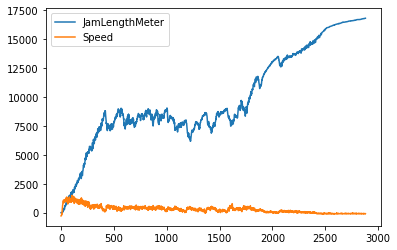

In [82]:
decision_threshold =[]
max_greentime_duration=[]
episode0(decision_threshold, max_greentime_duration) #PEAM

In [80]:
traci.close()